# Dummy Classifier Baseline

This notebook performs classification using a `DummyClassifier` as a baseline model on embeddings extracted from the Galaxy10 dataset with a ResNet-101 model pretrained on ImageNet.

We include:
- Evaluation of baseline performance
- Accuracy, balanced accuracy, precision, recall, F1
- Confusion matrix and per-class report
- Hierarchical class relation analysis


## Imports

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram


## Dataset.


In [32]:
# Load data
data = np.load('Galaxy10_Embedding_vectors/galaxy10_resnet101_embeddings_augmented_balanced.npz', allow_pickle=True)

# Separate train, val, and test
X_train = data['train_features']
y_train = data['train_labels']
X_val = data['val_features']
y_val = data['val_labels']
X_test = data['test_features']
y_test = data['test_labels']
class_names = data['class_names']

print(f"Original Train size: {X_train.shape[0]}")
print(f"Original Validation size: {X_val.shape[0]}")
print(f"Original Test size: {X_test.shape[0]}")
print(f"Original Embedding dimension: {X_train.shape[1]}")


Original Train size: 48970
Original Validation size: 3269
Original Test size: 3268
Original Embedding dimension: 2048


## Evaluate DummyClassifier on Test Set

Trains a DummyClassifier using the most frequent class from the training set, then evaluates it on the test set using accuracy, balanced accuracy, macro precision, recall, and F1 score. This provides a baseline to compare against more sophisticated models.

In [33]:
# Predict the class 4 for all test samples
y_pred = np.full_like(y_test, fill_value=4)

# Evaluate on test set
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Print results
print(f"Accuracy:             {acc:.4f}")
print(f"Balanced Accuracy:    {bal_acc:.4f}")
print(f"Macro Precision:      {precision:.4f}")
print(f"Macro Recall:         {recall:.4f}")
print(f"Macro F1 Score:       {f1:.4f}")


Accuracy:             0.3213
Balanced Accuracy:    0.1000
Macro Precision:      0.0321
Macro Recall:         0.1000
Macro F1 Score:       0.0486


## Confusion Matrices

Displays two confusion matrices: one with raw counts and one with row-wise percentages for the test set predictions.


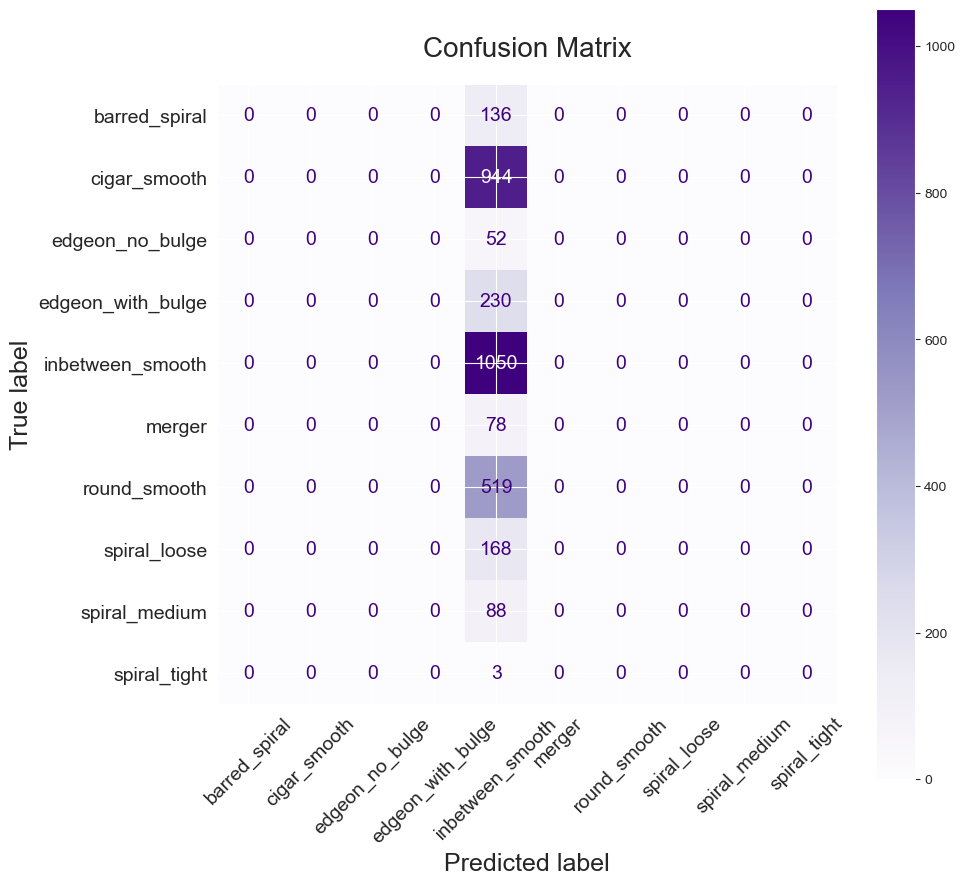

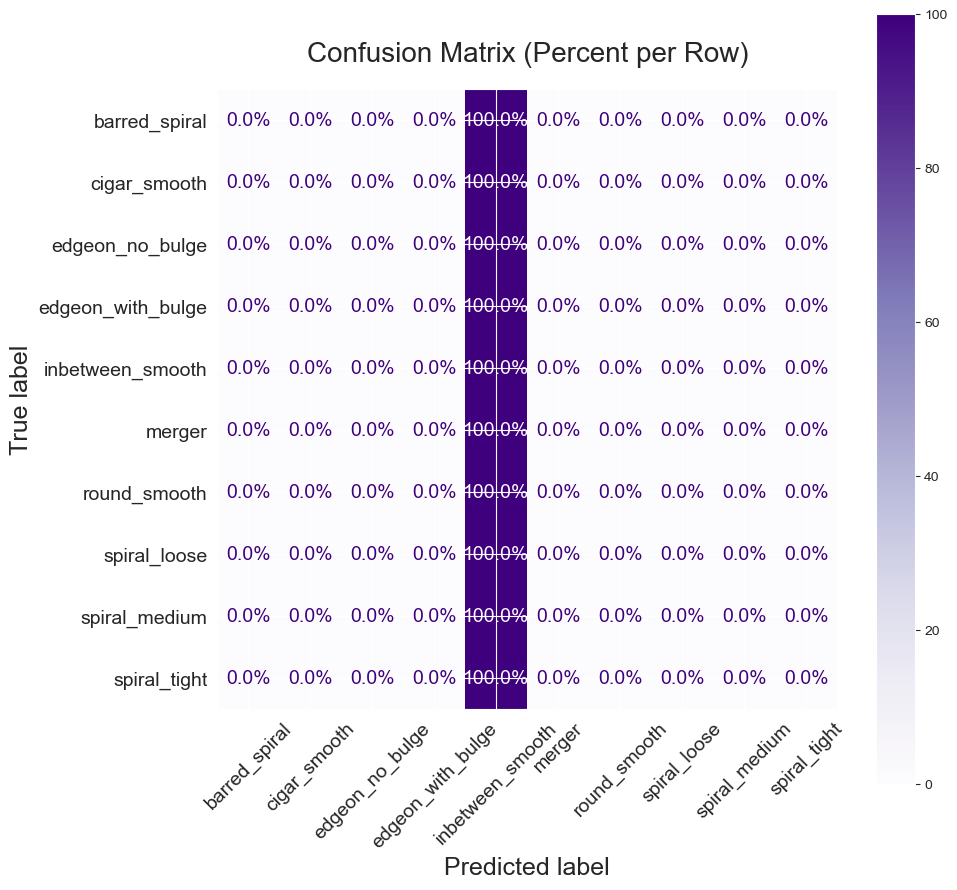

In [34]:
# Confusion matrix (raw counts)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Purples', xticks_rotation=45)

ax.set_title("Confusion Matrix", fontsize=20, pad=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=18)
ax.set_ylabel(ax.get_ylabel(), fontsize=18)
ax.tick_params(axis='both', labelsize=14)
for text in disp.text_.ravel():
    text.set_fontsize(14)

plt.show()

# Confusion matrix (row-wise percentages)
cm_percent = cm.astype(float) / cm.sum(axis=1)[:, None] * 100
disp_percent = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp_percent.plot(ax=ax, cmap='Purples', xticks_rotation=45, values_format='.1f')

for text in disp_percent.text_.ravel():
    text.set_text(f"{float(text.get_text()):.1f}%")
    text.set_fontsize(14)

ax.set_title("Confusion Matrix (Percent per Row)", fontsize=20, pad=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=18)
ax.set_ylabel(ax.get_ylabel(), fontsize=18)
ax.tick_params(axis='both', labelsize=14)

plt.show()

## Classification Report

Prints precision, recall, F1 score, and support for each class in the test set.


In [35]:
print(classification_report(y_test, y_pred, target_names=class_names, digits=4, zero_division=0))

                   precision    recall  f1-score   support

    barred_spiral     0.0000    0.0000    0.0000       136
     cigar_smooth     0.0000    0.0000    0.0000       944
  edgeon_no_bulge     0.0000    0.0000    0.0000        52
edgeon_with_bulge     0.0000    0.0000    0.0000       230
 inbetween_smooth     0.3213    1.0000    0.4863      1050
           merger     0.0000    0.0000    0.0000        78
     round_smooth     0.0000    0.0000    0.0000       519
     spiral_loose     0.0000    0.0000    0.0000       168
    spiral_medium     0.0000    0.0000    0.0000        88
     spiral_tight     0.0000    0.0000    0.0000         3

         accuracy                         0.3213      3268
        macro avg     0.0321    0.1000    0.0486      3268
     weighted avg     0.1032    0.3213    0.1563      3268

